# Тестовый ноутбук.
## Задачи:
1. Сформировать портфели из относительно привлекательных компаний. 
2. Исследовать их доходность относительно индекса МосБиржи.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import mpl_finance
import datetime
import matplotlib.dates as mdates


%matplotlib inline
#plt.style.use('seaborn-whitegrid')

# 1. Надёжный портфель.
 - Выберем 10 крупных компаний МосБиржи. 
 - Соберём портфель в равных долях.

## Компании:
1. ММК
2. Северсталь
3. НЛМК
4. Сбербанк
5. Алроса
6. Лукойл
7. Газпром
8. Россети
9. Россети
10. Аэрофлот


Комментарий: большинство компаний неплохо зарекомендовали себя на сравнительной оценке и оценке дивидендами. Но также есть и компании, которые не показали выдающихся результатов.

Ожидания: результаты "около" рынка, может чуть выше(но незначительно).

In [276]:
buf1 = pd.read_csv("buffer_1.txt")

In [321]:
pd.options.mode.chained_assignment = None  # default='warn'

In [322]:
def test_strategy(
    start_date, end_date, buffer_1
):
    buffer_1['date'] = pd.to_datetime(buffer_1['date'])
   
    buf = []
    tickers = set()
    tickers = {buffer_1.loc[i, 'ticker'] for i in range(1, len(buffer_1))}
    
    for i in tickers:
        buf.append(buffer_1.loc[(buffer_1['ticker'] == i) & (buffer_1['date'] < end_date) 
                              & (buffer_1['date'] > start_date)])
    
    result = buf[0]
    result['Index'] = [1.0 for i in range(len(buf[0]))]
    result['strategy_profit'] = [1.0 for i in range(len(buf[0]))]
    result['delta'] = [1.0 for i in range(len(buf[0]))] 
    
    for i in range(1, len(buf[0])):
        coef_for_backpack = 0
        for j in range(len(buf)):
            if buf[j]['ticker'].values[0] == 'Индекс МосБиржи':
                coef = buf[j]['close'].values[i]/buf[j]['close'].values[i - 1]
                result['Index'].values[i] = result['Index'].values[i - 1] * coef
            else:
                coef_for_backpack += (buf[j]['close'].values[i]/buf[j]['close'].values[i - 1]) * 0.1
        
        result['strategy_profit'].values[i] = result['strategy_profit'].values[i - 1] * coef_for_backpack   
        
    result['delta'] = result['strategy_profit'] - result['Index']
    res = result.set_index('date')
    
    fig1 = plt.figure(figsize=(16, 9))
    ax1 = plt.axes() 
    
#    ax1.set_title('Profit fot {}'.format(symbol))
    ax1.plot(res['Index'], color='blue', label='index')
    ax1.plot(res['strategy_profit'], color='red', label='strategy_profit')
    ax1.plot(res['delta'], color='black', label='delta')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Profit')
    ax1.legend(loc='best')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.grid(True)
    plt.show() 
    
    
    pass

# Посмотрим за последний год.

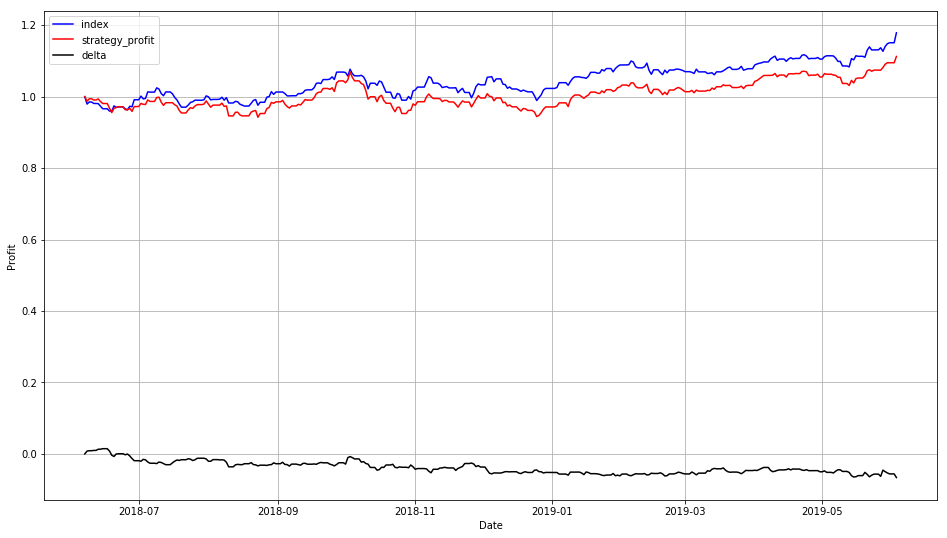

In [323]:
test_strategy('2018-06-06', '2019-06-04', buf)

### Результаты говорят сами за себя.
# Также за 3 года.

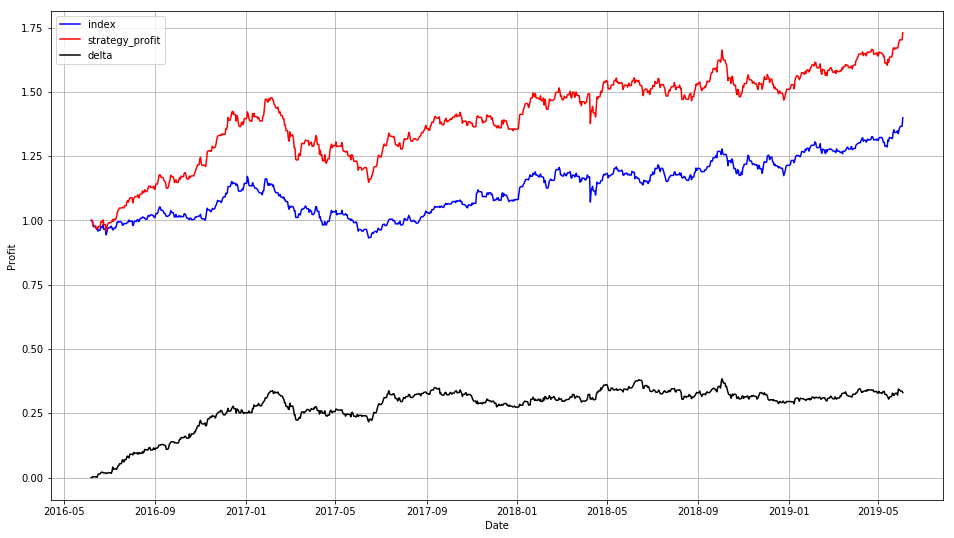

In [324]:
test_strategy('2016-06-06', '2019-06-04', buf)

# 2. Соберём более рискованный портфель.
### Компании:
1. Газпром Нефть
2. Башнефть
3. Электроцинк
4. Банк СПБ
5. Куйбышев азот
6. МРСК Волги
7. Энел
8. Лента
9. Распадская 
10. Челябинский металлургический комбинат

In [280]:
buf2 = pd.read_csv('buffer_2.txt')

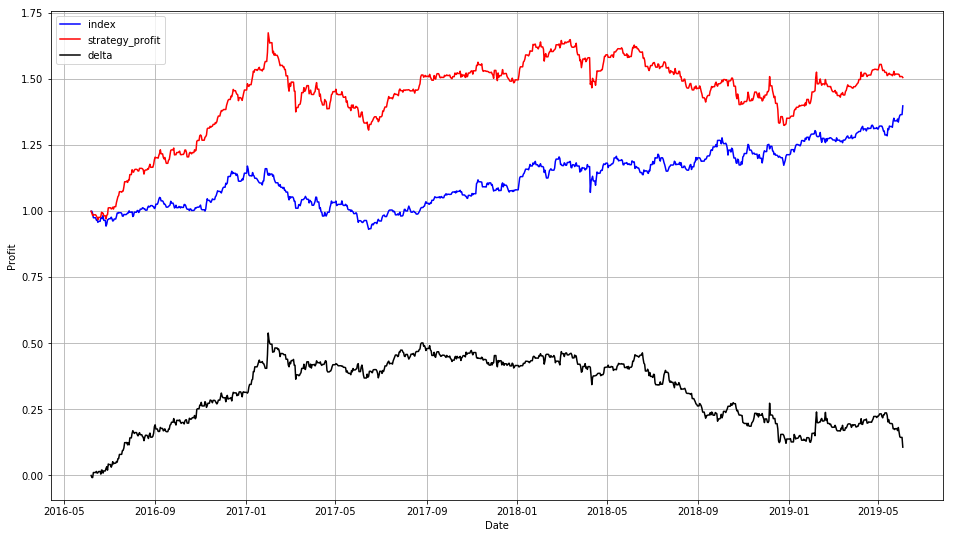

In [325]:
test_strategy('2016-06-06', '2019-06-04', buf2)

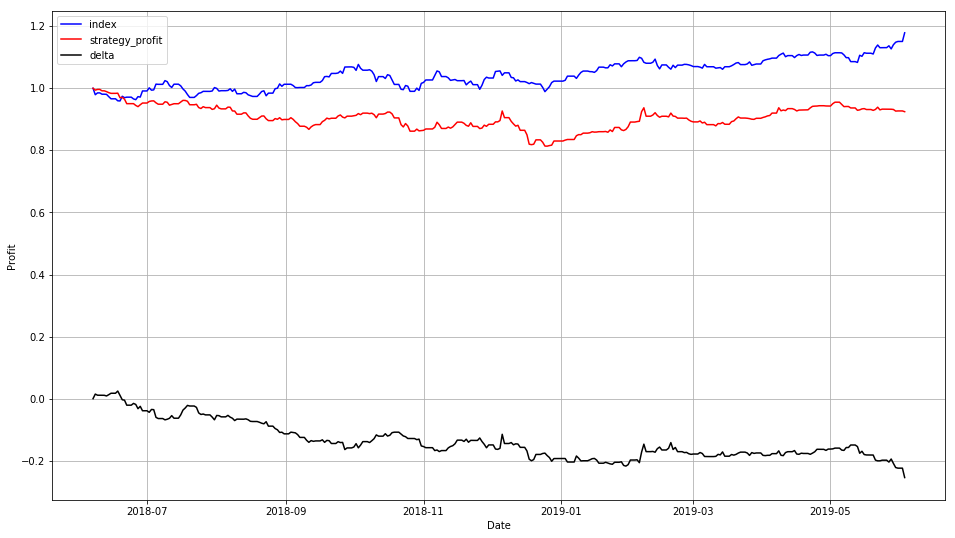

In [326]:
test_strategy('2018-06-06', '2019-06-04', buf2)

# 3. Соберём сбалансированный портфель.
#### Компании:
1. Газпром нефть
2. Северсталь
3. НЛМК
4. Банк СПБ
5. Куйбышев Азот
6. МРСК Волги
7. Энел
8. Распадская
9. Лукойл
10. Мосбиржа

In [298]:
buf3 = pd.read_csv('buffer_3.txt')

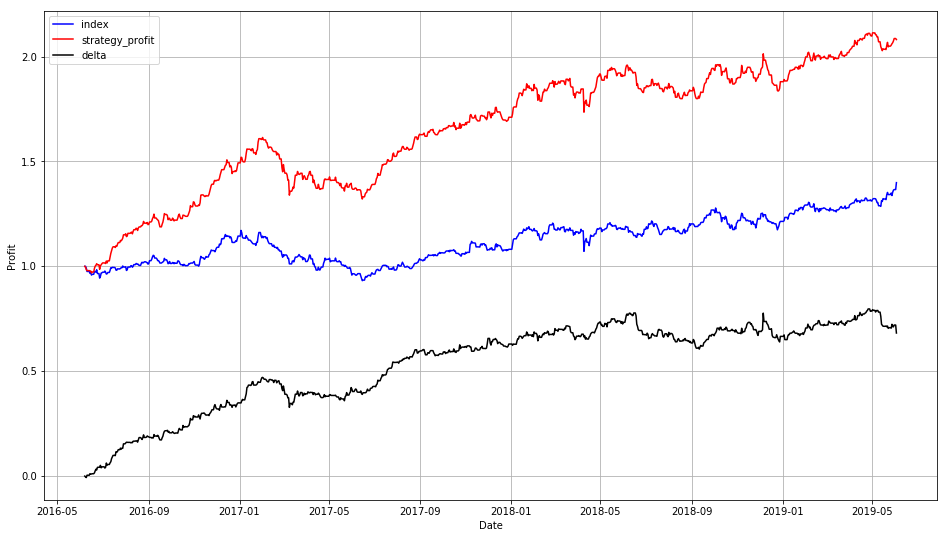

In [327]:
test_strategy('2016-06-06', '2019-06-04', buf3)

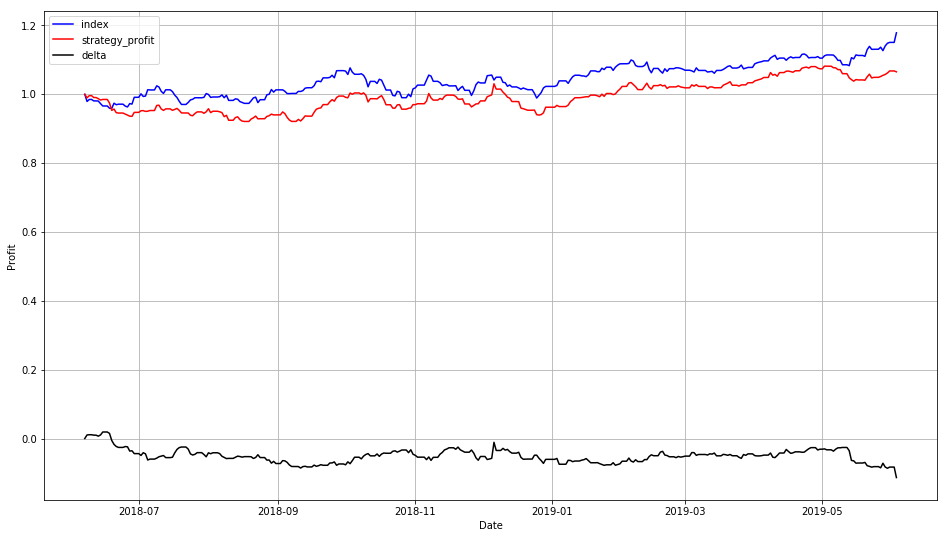

In [328]:
test_strategy('2018-06-06', '2019-06-04', buf3)

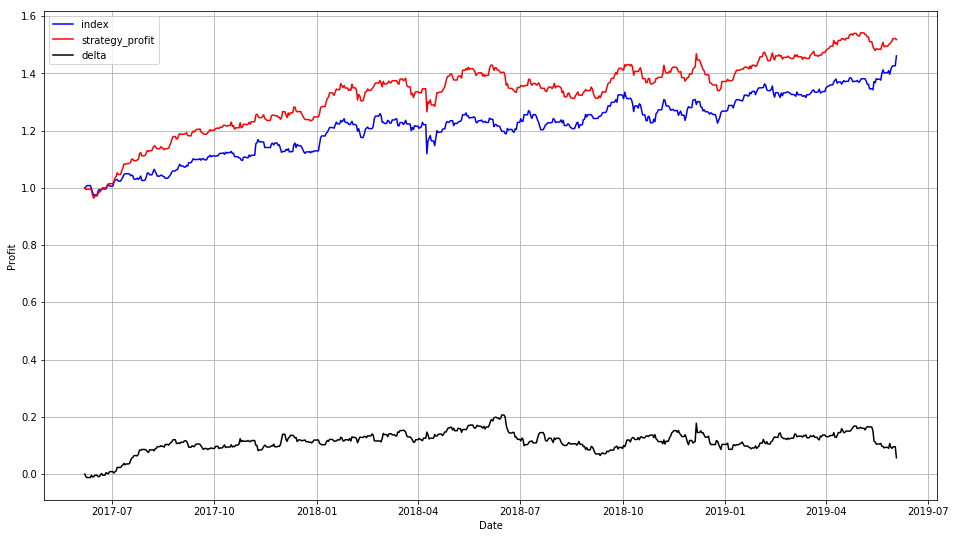

In [329]:
test_strategy('2017-06-06', '2019-06-04', buf3)

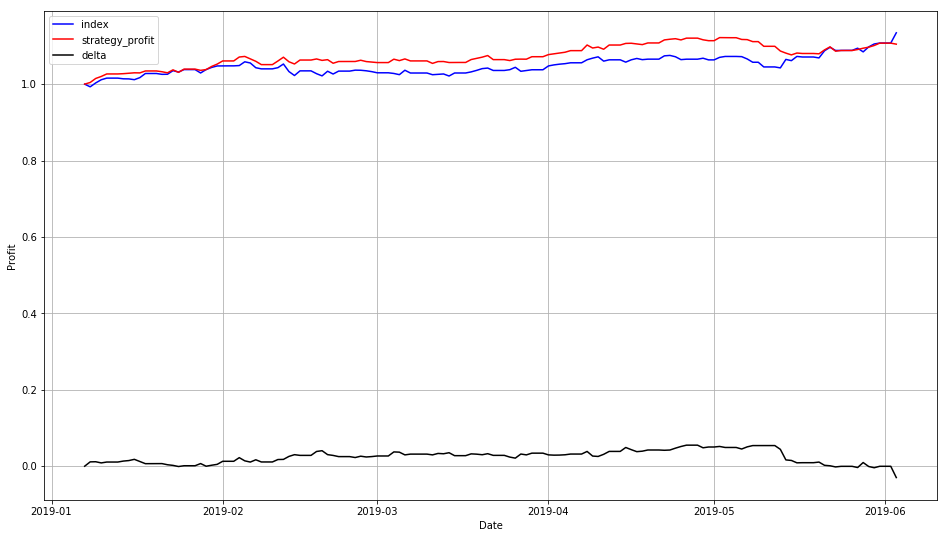

In [331]:
test_strategy('2019-01-06', '2019-06-04', buf3)